## Work
1. 請建立自己的 deep neural network
2. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
3. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import tensorflow.keras as keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dropout(0.2)(x)
    
    x = keras.layers.Dense(units=512, activation="relu")(x)
    x = keras.layers.Dropout(0.2)(x)
    
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dropout(0.2)(x)
    
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dropout(0.2)(x)
    
    x = keras.layers.Dense(units=128, activation="relu")(x)
    
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    
    return model

model = build_mlp()
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 3072)]            0         
                                                                 
 dense (Dense)               (None, 512)               1573376   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dropout_2 (Dropout)         (None, 256)               0     

In [5]:
optimizer = keras.optimizers.SGD(learning_rate=0.003, momentum=0.9)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [6]:
history = model.fit(x_train, y_train, 
                    epochs=500, 
                    batch_size=256, 
                    validation_data=(x_test, y_test), 
                    shuffle=True, 
                    verbose=2)

Epoch 1/500
196/196 - 7s - loss: 2.1949 - accuracy: 0.1760 - val_loss: 1.9793 - val_accuracy: 0.2815 - 7s/epoch - 37ms/step
Epoch 2/500
196/196 - 6s - loss: 1.9680 - accuracy: 0.2736 - val_loss: 1.8516 - val_accuracy: 0.3340 - 6s/epoch - 29ms/step
Epoch 3/500
196/196 - 5s - loss: 1.8704 - accuracy: 0.3202 - val_loss: 1.7642 - val_accuracy: 0.3653 - 5s/epoch - 26ms/step
Epoch 4/500
196/196 - 6s - loss: 1.8107 - accuracy: 0.3409 - val_loss: 1.7071 - val_accuracy: 0.3874 - 6s/epoch - 31ms/step
Epoch 5/500
196/196 - 6s - loss: 1.7619 - accuracy: 0.3639 - val_loss: 1.6628 - val_accuracy: 0.4008 - 6s/epoch - 30ms/step
Epoch 6/500
196/196 - 5s - loss: 1.7275 - accuracy: 0.3750 - val_loss: 1.6236 - val_accuracy: 0.4169 - 5s/epoch - 26ms/step
Epoch 7/500
196/196 - 5s - loss: 1.6945 - accuracy: 0.3875 - val_loss: 1.5955 - val_accuracy: 0.4264 - 5s/epoch - 25ms/step
Epoch 8/500
196/196 - 5s - loss: 1.6628 - accuracy: 0.4014 - val_loss: 1.5654 - val_accuracy: 0.4376 - 5s/epoch - 26ms/step
Epoch 9/

Epoch 67/500
196/196 - 5s - loss: 1.1228 - accuracy: 0.5980 - val_loss: 1.2886 - val_accuracy: 0.5487 - 5s/epoch - 25ms/step
Epoch 68/500
196/196 - 5s - loss: 1.1137 - accuracy: 0.5984 - val_loss: 1.2786 - val_accuracy: 0.5490 - 5s/epoch - 25ms/step
Epoch 69/500
196/196 - 5s - loss: 1.1094 - accuracy: 0.6023 - val_loss: 1.2964 - val_accuracy: 0.5441 - 5s/epoch - 25ms/step
Epoch 70/500
196/196 - 5s - loss: 1.1089 - accuracy: 0.6039 - val_loss: 1.2952 - val_accuracy: 0.5404 - 5s/epoch - 25ms/step
Epoch 71/500
196/196 - 5s - loss: 1.1061 - accuracy: 0.6042 - val_loss: 1.2765 - val_accuracy: 0.5491 - 5s/epoch - 26ms/step
Epoch 72/500
196/196 - 5s - loss: 1.0935 - accuracy: 0.6079 - val_loss: 1.2891 - val_accuracy: 0.5462 - 5s/epoch - 26ms/step
Epoch 73/500
196/196 - 5s - loss: 1.0974 - accuracy: 0.6052 - val_loss: 1.2958 - val_accuracy: 0.5496 - 5s/epoch - 25ms/step
Epoch 74/500
196/196 - 5s - loss: 1.0795 - accuracy: 0.6110 - val_loss: 1.2781 - val_accuracy: 0.5517 - 5s/epoch - 25ms/step


Epoch 133/500
196/196 - 5s - loss: 0.8555 - accuracy: 0.6931 - val_loss: 1.3484 - val_accuracy: 0.5582 - 5s/epoch - 25ms/step
Epoch 134/500
196/196 - 5s - loss: 0.8340 - accuracy: 0.7012 - val_loss: 1.3292 - val_accuracy: 0.5515 - 5s/epoch - 25ms/step
Epoch 135/500
196/196 - 5s - loss: 0.8456 - accuracy: 0.7001 - val_loss: 1.3151 - val_accuracy: 0.5625 - 5s/epoch - 25ms/step
Epoch 136/500
196/196 - 5s - loss: 0.8367 - accuracy: 0.6987 - val_loss: 1.3184 - val_accuracy: 0.5568 - 5s/epoch - 26ms/step
Epoch 137/500
196/196 - 5s - loss: 0.8393 - accuracy: 0.6992 - val_loss: 1.3288 - val_accuracy: 0.5597 - 5s/epoch - 25ms/step
Epoch 138/500
196/196 - 5s - loss: 0.8222 - accuracy: 0.7057 - val_loss: 1.3526 - val_accuracy: 0.5541 - 5s/epoch - 25ms/step
Epoch 139/500
196/196 - 5s - loss: 0.8209 - accuracy: 0.7055 - val_loss: 1.3720 - val_accuracy: 0.5513 - 5s/epoch - 25ms/step
Epoch 140/500
196/196 - 5s - loss: 0.8132 - accuracy: 0.7078 - val_loss: 1.3472 - val_accuracy: 0.5558 - 5s/epoch - 25

196/196 - 5s - loss: 0.6247 - accuracy: 0.7759 - val_loss: 1.4961 - val_accuracy: 0.5589 - 5s/epoch - 25ms/step
Epoch 199/500
196/196 - 5s - loss: 0.6216 - accuracy: 0.7762 - val_loss: 1.4773 - val_accuracy: 0.5612 - 5s/epoch - 25ms/step
Epoch 200/500
196/196 - 5s - loss: 0.6131 - accuracy: 0.7799 - val_loss: 1.4816 - val_accuracy: 0.5580 - 5s/epoch - 25ms/step
Epoch 201/500
196/196 - 5s - loss: 0.6143 - accuracy: 0.7805 - val_loss: 1.4406 - val_accuracy: 0.5578 - 5s/epoch - 26ms/step
Epoch 202/500
196/196 - 5s - loss: 0.6113 - accuracy: 0.7847 - val_loss: 1.4783 - val_accuracy: 0.5603 - 5s/epoch - 25ms/step
Epoch 203/500
196/196 - 5s - loss: 0.6190 - accuracy: 0.7785 - val_loss: 1.4742 - val_accuracy: 0.5648 - 5s/epoch - 25ms/step
Epoch 204/500
196/196 - 5s - loss: 0.6036 - accuracy: 0.7844 - val_loss: 1.4805 - val_accuracy: 0.5576 - 5s/epoch - 25ms/step
Epoch 205/500
196/196 - 5s - loss: 0.6169 - accuracy: 0.7803 - val_loss: 1.4898 - val_accuracy: 0.5630 - 5s/epoch - 25ms/step
Epoch 

Epoch 264/500
196/196 - 5s - loss: 0.4715 - accuracy: 0.8339 - val_loss: 1.6274 - val_accuracy: 0.5591 - 5s/epoch - 25ms/step
Epoch 265/500
196/196 - 5s - loss: 0.4658 - accuracy: 0.8348 - val_loss: 1.6323 - val_accuracy: 0.5598 - 5s/epoch - 26ms/step
Epoch 266/500
196/196 - 5s - loss: 0.4626 - accuracy: 0.8356 - val_loss: 1.6085 - val_accuracy: 0.5601 - 5s/epoch - 27ms/step
Epoch 267/500
196/196 - 5s - loss: 0.4743 - accuracy: 0.8303 - val_loss: 1.6264 - val_accuracy: 0.5576 - 5s/epoch - 25ms/step
Epoch 268/500
196/196 - 5s - loss: 0.4593 - accuracy: 0.8370 - val_loss: 1.6440 - val_accuracy: 0.5555 - 5s/epoch - 26ms/step
Epoch 269/500
196/196 - 5s - loss: 0.4701 - accuracy: 0.8337 - val_loss: 1.6416 - val_accuracy: 0.5574 - 5s/epoch - 25ms/step
Epoch 270/500
196/196 - 5s - loss: 0.4499 - accuracy: 0.8410 - val_loss: 1.6629 - val_accuracy: 0.5583 - 5s/epoch - 25ms/step
Epoch 271/500
196/196 - 5s - loss: 0.4372 - accuracy: 0.8465 - val_loss: 1.6233 - val_accuracy: 0.5616 - 5s/epoch - 25

196/196 - 5s - loss: 0.3664 - accuracy: 0.8704 - val_loss: 1.7691 - val_accuracy: 0.5642 - 5s/epoch - 26ms/step
Epoch 330/500
196/196 - 5s - loss: 0.3559 - accuracy: 0.8760 - val_loss: 1.7564 - val_accuracy: 0.5637 - 5s/epoch - 25ms/step
Epoch 331/500
196/196 - 5s - loss: 0.3605 - accuracy: 0.8743 - val_loss: 1.7258 - val_accuracy: 0.5633 - 5s/epoch - 25ms/step
Epoch 332/500
196/196 - 5s - loss: 0.3454 - accuracy: 0.8775 - val_loss: 1.7800 - val_accuracy: 0.5541 - 5s/epoch - 25ms/step
Epoch 333/500
196/196 - 5s - loss: 0.3517 - accuracy: 0.8754 - val_loss: 1.7898 - val_accuracy: 0.5615 - 5s/epoch - 25ms/step
Epoch 334/500
196/196 - 5s - loss: 0.3602 - accuracy: 0.8753 - val_loss: 1.7774 - val_accuracy: 0.5630 - 5s/epoch - 25ms/step
Epoch 335/500
196/196 - 5s - loss: 0.3541 - accuracy: 0.8754 - val_loss: 1.7874 - val_accuracy: 0.5583 - 5s/epoch - 25ms/step
Epoch 336/500
196/196 - 5s - loss: 0.3465 - accuracy: 0.8789 - val_loss: 1.7788 - val_accuracy: 0.5554 - 5s/epoch - 26ms/step
Epoch 

Epoch 395/500
196/196 - 5s - loss: 0.2954 - accuracy: 0.8956 - val_loss: 1.8809 - val_accuracy: 0.5628 - 5s/epoch - 25ms/step
Epoch 396/500
196/196 - 5s - loss: 0.2945 - accuracy: 0.8972 - val_loss: 1.8674 - val_accuracy: 0.5632 - 5s/epoch - 26ms/step
Epoch 397/500
196/196 - 5s - loss: 0.2967 - accuracy: 0.8971 - val_loss: 1.9183 - val_accuracy: 0.5587 - 5s/epoch - 25ms/step
Epoch 398/500
196/196 - 5s - loss: 0.2963 - accuracy: 0.8955 - val_loss: 1.8610 - val_accuracy: 0.5585 - 5s/epoch - 25ms/step
Epoch 399/500
196/196 - 5s - loss: 0.2859 - accuracy: 0.8995 - val_loss: 1.9168 - val_accuracy: 0.5614 - 5s/epoch - 25ms/step
Epoch 400/500
196/196 - 5s - loss: 0.2842 - accuracy: 0.9004 - val_loss: 1.8867 - val_accuracy: 0.5640 - 5s/epoch - 25ms/step
Epoch 401/500
196/196 - 5s - loss: 0.2920 - accuracy: 0.8998 - val_loss: 1.9082 - val_accuracy: 0.5593 - 5s/epoch - 25ms/step
Epoch 402/500
196/196 - 5s - loss: 0.2900 - accuracy: 0.9001 - val_loss: 1.8906 - val_accuracy: 0.5576 - 5s/epoch - 25

196/196 - 5s - loss: 0.2471 - accuracy: 0.9143 - val_loss: 1.9606 - val_accuracy: 0.5613 - 5s/epoch - 25ms/step
Epoch 461/500
196/196 - 5s - loss: 0.2446 - accuracy: 0.9149 - val_loss: 1.9444 - val_accuracy: 0.5620 - 5s/epoch - 25ms/step
Epoch 462/500
196/196 - 5s - loss: 0.2347 - accuracy: 0.9191 - val_loss: 1.9662 - val_accuracy: 0.5656 - 5s/epoch - 25ms/step
Epoch 463/500
196/196 - 5s - loss: 0.2238 - accuracy: 0.9228 - val_loss: 1.9977 - val_accuracy: 0.5634 - 5s/epoch - 26ms/step
Epoch 464/500
196/196 - 5s - loss: 0.2425 - accuracy: 0.9165 - val_loss: 2.0099 - val_accuracy: 0.5569 - 5s/epoch - 25ms/step
Epoch 465/500
196/196 - 5s - loss: 0.2420 - accuracy: 0.9171 - val_loss: 2.0199 - val_accuracy: 0.5594 - 5s/epoch - 25ms/step
Epoch 466/500
196/196 - 5s - loss: 0.2434 - accuracy: 0.9161 - val_loss: 2.0251 - val_accuracy: 0.5575 - 5s/epoch - 25ms/step
Epoch 467/500
196/196 - 5s - loss: 0.2557 - accuracy: 0.9106 - val_loss: 1.9616 - val_accuracy: 0.5599 - 5s/epoch - 27ms/step
Epoch 

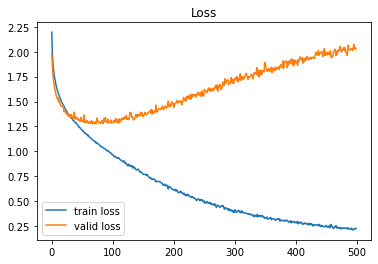

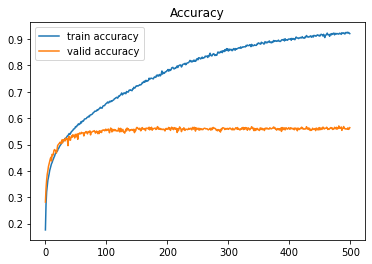

In [8]:
import matplotlib.pyplot as plt

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.figure()
plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.figure()
plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()